## 해당 프로그램은 Chrome Driver를 사용합니다.
## 미리 Chrome Driver가 현재 Chrome 버전에 맞게 설치가 되어 있는지 확인해주시고, 해당 프로그램의 3번째 코드 셀의 두 함수 get_nut와 get_excal의 path='...'에 해당 Chrome Driver가 저장된 위치를 설정해주세요.
## chromedriver.exe 파일이 있는 곳으로 설정해주어야 합니다.
- [크롬 드라이버 다운로드](https://chromedriver.chromium.org/downloads)

In [1]:
import pandas as pd
import os
import csv
import numpy as np
import matplotlib
from matplotlib import font_manager
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from datetime import date

class verbose_noreturn:
    def __init__(self,f):
        self.func = f
    
    def __call__(self,*args):
        print("\n------------------------------------------------\n")
        startsec = time.time()
        self.func(*args)
        print("\n실행시간은:",time.time()-startsec)
        print("\n------------------------------------------------\n")

class verbose:
    def __init__(self,f):
        self.func = f
    
    def __call__(self,*args):
        print("\n------------------------------------------------\n")
        startsec = time.time()
        res = self.func(*args)
        if type(res)==type(int()):
            print("\n실행시간은:",time.time()-startsec)
            print("\n------------------------------------------------\n")
            yield res
        else:
            for item in list(res):
                yield item
        print("\n실행시간은:",time.time()-startsec)
        print("\n------------------------------------------------\n")

class NegativeException(Exception):
    def __init__(self,msg):
        self._message=msg

class GenderException(Exception):
    def __init__(self,msg):
        self._message=msg
        
class Person(object):
    pnum=0
    def __init__(self):
        self.name=""
        self.age=0
        self.gender=""
        self.height=0.0
        self.weight=0.0
        Person.pnum+=1
        while True: 
            try: 
                self.get_data()
            except NegativeException as e:
                print(e.args[0])
            except GenderException as e:
                print(e.args[0])
            except ValueError:
                print("숫자를 입력하시오.")
            else:
                break
        
        self.get_BMR()
        self.save_person()
        
    def get_data(self):
        self.name=input("Name: ")
        self.age=float(input("Age: "))
        self.gender=input("Gender(m/f): ")
        self.height=float(input("Height(cm): "))
        self.weight=float(input("Weight(kg): "))
        if self.age<0 or self.height<0 or self.weight<0:
            raise NegativeException("양수의 값을 입력하시오.")
        if self.gender != 'm' and self.gender!='f':
            raise GenderException("m또는 f의 값을 입력하시오.")
        
    def get_BMR(self):
        if self.gender=='m':
            self.BMR = 66.47+(13.75*self.weight)+(5*self.height)-(6.76*self.age)
        else:
            self.BMR = 655.1+(9.56*self.weight)+(1.85*self.height)-(4.68*self.age)
        self.BMR = int(self.BMR)
    def save_person(self):
        data = {'ID':Person.pnum,'Name':self.name,'Age':self.age,'Gender':self.gender,
               'Height':self.height,'Weight':self.weight,'BMR':self.BMR}
        df = pd.DataFrame(data,index=[Person.pnum])
        
        if not os.path.exists('plist.csv'):
            df.to_csv('plist.csv',index=False,mode='w')
        else:
            df.to_csv('plist.csv',index=False,mode='a',header=False)
        
    def save_dp(self,df):
        filename = str(df['ID'].values[0])+"_data.txt"
        if not os.path.exists(filename):
            f = open(filename,"w")
            f.write(str(self.reccal)+"\n")
            f.write(str(self.carb)+" "+str(self.protein)+" "+str(self.fat)+"\n")
        
class Diet_Person(Person):
    dpnum=0
    def __init__(self,df,num):
        Diet_Person.dpnum+=1
        self.name = df['Name'].values[0]
        self.BMR = int(df['BMR'].values[0])
        self.weight = df['Weight'].values[0]
        self.reccal = self.BMR * num - 500
        self.get_intake()
        self.save_dp(df)
        
    def get_intake(self):
        self.carb = self.reccal*0.45
        self.carb = self.carb/4
        self.protein = self.reccal*0.3
        self.protein = self.protein/4
        self.fat = self.reccal*0.25
        self.fat= self.fat/9
        
    @staticmethod
    def check_score(data,reccal):
        carb = data['Carb'][0]*4
        protein = data['Protein'][0]*4
        fat = data['Fat'][0]*9
        cal = data['Calorie'][0]
        carb_ratio = int(carb/cal*100)
        prot_ratio = int(protein/cal*100)
        fat_ratio = int(fat/cal*100)
        score = abs(carb_ratio-45)+abs(prot_ratio-30)+abs(fat_ratio-25)
        score = 100-score
        if cal < reccal: score -=5
        else: score -= 10
        score += int(data['Exercise'][0]/10)
        return score
        
class Keep_Person(Person):
    npnum=0
    def __init__(self,df,num):
        Keep_Person.npnum+=1
        self.name = df['Name'].values[0]
        self.BMR = int(df['BMR'].values[0])
        self.weight = df['Weight'].values[0]
        self.reccal = self.BMR * num
        self.get_intake()
        self.save_dp(df)
        
    def get_intake(self):
        self.carb = self.reccal*0.55
        self.carb = self.carb/4
        self.protein = self.reccal*0.25
        self.protein = self.protein/4
        self.fat = self.reccal*0.2
        self.fat= self.fat/9
        
    @staticmethod
    def check_score(data,reccal):
        carb = data['Carb'][0]*4
        protein = data['Protein'][0]*4
        fat = data['Fat'][0]*9
        cal = data['Calorie'][0]
        carb_ratio = int(carb/cal*100)
        prot_ratio = int(protein/cal*100)
        fat_ratio = int(fat/cal*100)
        score = abs(carb_ratio-55)+abs(prot_ratio-25)+abs(fat_ratio-20)
        score = 100-score
        if cal < reccal: score -=5
        else: score -= 15
        score += int(data['Exercise'][0]/10)
        return score

In [6]:
%matplotlib inline

def menu_3():
    if not os.path.exists('plist.csv'):
        print("등록된 사용자가 없습니다.")
        return
    df = pd.read_csv('plist.csv')
    if 'onDiet' not in list(df.keys()):
        df['onDiet']=np.nan
    if 'reccal' not in list(df.keys()):
        df['reccal']=np.nan
    df_name = df[['ID','Name']]
    print(df_name.to_csv(sep='\t', index=False))
    self_name = input("자신의 이름을 입력하시오: ")
    person = df[df['Name']==self_name]
    #print(person)
    if person.empty:
        print("존재하지 않는 이름입니다.")
        return
    #print(str(person['onDiet'].values[0]))
    if str(person['onDiet'].values[0])!='nan':
        print("이미 서비스가 등록되어있습니다.")
        return
    else:
        print("일주일에 운동하는 횟수는?")
        print("1) 운동을 따로 하지 않는다 또는 가벼운 운동은 2회 이하로 한다")
        print("2) 격렬한 운동을 1~2회 또는 가벼운 운동을 3~4회 한다")
        print("3) 격렬한 운동을 3~4회 또는 가벼운 운동을 5~7회 한다")
        print("4) 격렬한 운동을 5~6회 한다")
        print("5) 격렬한 운동을 7회 이상 한다")
        exersise = input("일주일간 운동하는 횟수를 보기에서 고르시오.")
        if exersise=='1':
            num = 1.2
        elif exersise=='2':
            num=1.375
        elif exersise=='3':
            num=1.425
        elif exersise == '4':
            num=1.55
        elif exersise == '5':
            num=1.75
        else:
            print("1~5 중 하나를 입력하시오.")
            return
        ondiet = input("체중 감량이 목표이면 1, 아니라면 2를 입력하시오.")
        if ondiet=='1':
            df.loc[person['ID'].values[0]-1,['onDiet']]='Y'
            diet_person=Diet_Person(person,num)
            df.loc[person['ID'].values[0]-1,['reccal']]=diet_person.reccal
        elif ondiet=='2':
            df.loc[person['ID'].values[0]-1,['onDiet']]='N'
            normal_person=Keep_Person(person,num)
            df.loc[person['ID'].values[0]-1,['reccal']]=normal_person.reccal
        else:
            print("1 또는 2의 값을 입력하시오.")
            return
    df.to_csv('plist.csv',index=False,mode='w')
    
def menu_4():
    if not os.path.exists('plist.csv'):
        print("등록된 사용자가 없습니다.")
        return
    df = pd.read_csv('plist.csv')
    df_name = df[['ID','Name']]
    print(df_name.to_csv(sep='\t', index=False))
    self_ID = input("자신의 ID숫자를 입력하시오: ")
    person = df[df['ID']==int(self_ID)]
    #print(person)
    if person.empty:
        print("존재하지 않는 ID입니다.")
        return
    filename = str(person['ID'].values[0])+"_data.txt"
    if not os.path.exists(filename):
        print("메뉴 3에서 서비스 등록을 해주세요.")
        return
    f = open(filename, "r")
    read = f.read()
    split = read.split()
    reccal = float(split[0])
    carb = float(split[1])
    protein = float(split[2])
    fat = float(split[3])
    print("\n------------------------------------------------------------------------------------------------\n")
    plt.pie([carb*4,protein*4,fat*9],labels=['Carb','Protein','Fat'],
        shadow=True,autopct="%.1f%%",startangle=140,counterclock=False, colors=['lightskyblue','lightcoral','yellowgreen'])
    plt.title("Recommended Intake (kcal)")
    plt.show()
    print("\n------------------------------------------------------------------------------------------------\n")
    print("권장섭취량:")
    print("탄수화물: %.1fg"%(carb))
    print("단백질: %.1fg"%(protein))
    print("지방: %.1fg"%(fat))
    print("권장 섭취 칼로리 총합: %d kcal" %reccal)
    filename = str(person['ID'].values[0])+"_data.csv"
    if not os.path.exists(filename):
        print("아직 기록된 운동 및 식단이 없습니다.\n메뉴 5에서 해당 사항 기록 후 다시 와주세요.")
        return
    show_df = pd.read_csv(filename)
    show_df.sort_values(by=['Date'],axis=0,inplace=True)
    fig, axes = plt.subplots(2,1)
    axes[0].plot(list(show_df['Date']),list(show_df['Calorie']),color='lightcoral',marker='o',linestyle='solid')
    axes[0].set_title("Calorie Intake History (kcal)")
    
    axes[1].plot(list(show_df['Date']),list(show_df['Exercise']),color='indianred',marker='o',linestyle='solid')
    axes[1].set_title("Exercise History (kcal)")
    plt.tight_layout()
    print("\n------------------------------------------------------------------------------------------------\n")
    plt.show()
    print("\n------------------------------------------------------------------------------------------------\n")
    print("\n------------------------------------------------------------------------------------------------\n")
    show_daily(str(person['ID'].values[0]))
    print("\n------------------------------------------------------------------------------------------------\n")
    
def show_daily(ID):
    filename = ID+"_data.txt"
    f = open(filename, "r")
    read = f.read()
    split = read.split()
    reccal = float(split[0])
    carb = float(split[1])
    protein = float(split[2])
    fat = float(split[3])
    
    filename = ID+"_data.csv"
    df = pd.read_csv(filename).copy()
    df.sort_values(by=['Date'],inplace=True,ascending=True)
    
    df_cal = df[['Date','Calorie']].copy()
    df_cal.loc[len(df_cal)] = ['Recommended',reccal]
    plt.barh(list(df_cal['Date']),list(df_cal['Calorie']),color='skyblue')
    plt.title("Calorie Intake Compared to Recommended Intake")
    
    plt.show()
    print("\n------------------------------------------------------------------------------------------------\n")
    for i in range(len(df)):
        data = df.iloc[i]
        v1 = list(data[2:5])
        v2 = [carb,protein,fat]
        n = 1  
        t = 2 
        d = 3
        w = 1 
        store1_x = [t*element + w*n for element in range(d)]       
        n = 2
        store2_x = [t*element + w*n for element in range(d)]
        ax = plt.subplot()
        ax.bar(store1_x, v2,color='rosybrown',alpha=0.8)
        ax.bar(store2_x, v1,color='darksalmon',alpha=0.8)
        middle_x = [(a+b)/2 for (a,b) in zip(store1_x, store2_x)]
        ax.set_xticks(middle_x)
        ax.set_xticklabels(["Carb","Protein","Fat"])
        plt.title(str(data[0]))
        plt.legend(['Recommended','Actual'])
        i=0
        for p in ax.patches: 
            left, bottom, width, height = p.get_bbox().bounds 
            ax.annotate("%.1f g"%(height), (left+width/2, height*1.01), ha='center')
        
        plt.show()

def menu_5():
    if not os.path.exists('plist.csv'):
        print("등록된 사용자가 없습니다.")
        return
    df = pd.read_csv('plist.csv').copy()
    df_name = df[['ID','Name']]
    print(df_name.to_csv(sep='\t', index=False))
    self_ID = input("자신의 ID숫자를 입력하시오: ")
    person = df[df['ID']==int(self_ID)]
    #print(person)
    if person.empty:
        print("존재하지 않는 ID입니다.")
        return
    filename = str(person['ID'].values[0])+"_data.txt"
    if not os.path.exists(filename):
        print("메뉴 3에서 서비스 등록을 먼저 하시오.")
        return
    filename = str(person['ID'].values[0])+"_data.csv"
    print("식단 및 운동을 기록할 날짜를 기입하시오.")
    try: 
        year = int(input("년도: "))
        month = int(input("월: "))
        day = int(input("일: "))
    except ValueError:
        print("오직 정수만 입력하시오.")
        return
    try:
        today = date(year,month,day)
    except:
        print("년/월/일을 정확히 입력하시오.")
        return menu_5()
    exists=-1
    if os.path.exists(filename):
        data_csv = pd.read_csv(filename)
        date_list = list(data_csv['Date'])
        for index,date_ in enumerate(date_list):
            if str(date_)==str(today):
                exists = index
                
    sum_cal = 0
    sum_carb = 0
    sum_prot = 0
    sum_fat = 0
    sum_excal = 0
    if exists >= 0:
        sum_cal = float(data_csv.iloc[exists,1])
        sum_carb = float(data_csv.iloc[exists,2])
        sum_prot = float(data_csv.iloc[exists,3])
        sum_fat = float(data_csv.iloc[exists,4])
        sum_excal = float(data_csv.iloc[exists,5])
    print("기입할 음식의 이름을 입력하시오. 기입을 멈추려면 0을 입력하시오.")
    while True:
        food = input("음식: ")
        if food == '0':
            break
        else:
            cal,carb,prot,fat=get_nut(food)
            sum_cal+=cal
            sum_carb+=carb
            sum_prot+=prot
            sum_fat+=fat
    data = {'Date':[str(today)],'Calorie':[sum_cal],'Carb':[sum_carb],'Protein':[sum_prot],'Fat':[sum_fat]}
    if sum_cal==0:
        print("음식은 반드시 입력해야합니다.")
        return
    print("기입할 운동의 이름을 입력하시오. 기입을 멈추려면 0을 입력하시오.")
    
    while True:
        ex = input("운동: ")
        if ex=='0':
            break
        time= int(float(input("__분: ")))
        excal = get_excal(ex,time)
        sum_excal+=int(next(excal))
    data['Exercise']=[sum_excal]
    new_df = pd.DataFrame(data)
    if not os.path.exists(filename):
        new_df.to_csv(filename,index=False,mode='w')
    else:
        if exists>=0:
            extra = pd.read_csv(filename)
            extra.iloc[exists,1]=sum_cal
            extra.iloc[exists,2]=sum_carb
            extra.iloc[exists,3]=sum_prot
            extra.iloc[exists,4]=sum_fat
            extra.iloc[exists,5]=sum_excal
            extra.to_csv(filename,index=False,mode='w')
        else:
            new_df.to_csv(filename,index=False,mode='a',header=False)
        
    if person['onDiet'].values[0]=='Y':
        score = Diet_Person.check_score(data,int(person['reccal'].values[0]))
    else:
        score = Keep_Person.check_score(data,int(person['reccal'].values[0]))
        
    if os.path.exists("rank.csv"):
        score_df = pd.read_csv("rank.csv").copy()
        if len(score_df)!=len(df):
            score_df.loc[len(score_df)]=np.nan
            score_df.loc[len(score_df)-1,'Name']=person['Name'].values[0]
    else:
        df[str(today)]=np.nan
        score_df = df[['Name',str(today)]]
    
    try:
        score_df.loc[score_df['Name']==person['Name'].values[0],[str(today)]]=score
    except:
        for i in range(len(score_df)):
            score_df.loc[i,str(today)]=np.nan
        score_df.loc[score_df['Name']==person['Name'].values[0],[str(today)]]=score
    score_df.to_csv("rank.csv",index=False,mode='w')

@verbose_noreturn
def menu_6():
    """
    Mac 사용자의 경우 아래 font_name의 fname을 폰트가 저장되어 있는 위치로 설정해주세요.
    한글이 지원되는 폰트를 입력해주세요.
    """
    font_name = font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
    matplotlib.rc('font',family=font_name)
    if not os.path.exists("rank.csv"):
        print("메뉴 5에서 식단 및 운동 기록을 하십시오.")
        return
    df = pd.read_csv("rank.csv",index_col='Name')
    df['Total Score']=df.sum(axis=1)
    df.sort_values(by=['Total Score'],axis=0,inplace=True,ascending=False)
    print("\n***사용자 간 순위***")
    print(df[['Total Score']].to_csv(sep='\t'))
    
    df.sort_values(by=['Total Score'],axis=0,inplace=True,ascending=True)
    del df['Total Score']
    
    ax = df.plot(kind='barh',stacked=True,width=0.35)
    for p in ax.patches:
        left,bottom,width,height = p.get_bbox().bounds
        ax.annotate("%d"%(width),xy=(left+width/2,bottom+height/2),ha='center',va='center')
    plt.show()

In [7]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
import time

@verbose
def get_nut(food):
    """
    해당 함수는 Chrome Driver를 사용합니다.
    Chrome version에 맞는 Chrome Driver가 설치되어있는지 확인해주시고,
    Chrome Driver의 위치를 아래 path변수에 입력해주세요.
    """
    path= '/Users/user/Anaconda3/chromedriver'
    driver = webdriver.Chrome(path)
    url = 'https://www.fatsecret.kr/%EC%B9%BC%EB%A1%9C%EB%A6%AC-%EC%98%81%EC%96%91%EC%86%8C/search?q=%EB%94%B8%EA%B8%B0'
    driver.get(url)
    src = driver.page_source
    soup = BeautifulSoup(src)
    
    element = driver.find_element_by_id("ctl08_ByFood")
    element.clear()
    element.send_keys(food)
    locate = '#searchForm > div:nth-child(2) > a > span.middle'
    driver.find_element_by_css_selector(locate).click()
    time.sleep(1)
    try:
        driver.find_element_by_class_name("prominent").click()
    except:
        print("찾는 음식이 없습니다.")
        driver.close()
        return (0,0,0,0)
    locate = '#content > table > tbody > tr > td.leftCell > div > table > tbody > tr > td.factPanel > div.nutrition_facts.international > div.serving_size.black.serving_size_value'
    time.sleep(2)
    serve_size = driver.find_element_by_css_selector(locate).text
    locate = '#content > table > tbody > tr > td.leftCell > div > table > tbody > tr > td.details > div > table:nth-child(2) > tbody > tr > td:nth-child(1) > div.factValue'
    cal = int(driver.find_element_by_css_selector(locate).text)
    locate = '#content > table > tbody > tr > td.leftCell > div > table > tbody > tr > td.details > div > table:nth-child(2) > tbody > tr > td:nth-child(3) > div.factValue'
    fat = float(driver.find_element_by_css_selector(locate).text.split('g')[0])
    locate = '#content > table > tbody > tr > td.leftCell > div > table > tbody > tr > td.details > div > table:nth-child(2) > tbody > tr > td:nth-child(5) > div.factValue'
    carb = float(driver.find_element_by_css_selector(locate).text.split('g')[0])
    locate = '#content > table > tbody > tr > td.leftCell > div > table > tbody > tr > td.details > div > table:nth-child(2) > tbody > tr > td:nth-child(7) > div.factValue'
    prot = float(driver.find_element_by_css_selector(locate).text.split('g')[0])
    driver.close()
    
    print(serve_size+"의 몇 배를 섭취하였는지 입력하시오. (소수점 가능)")
    while True:
        try:
            mult = float(input())
        except ValueError:
            print("숫자를 입력하시오.")
        except mult==0:
            print("0보다 큰 값을 입력하시오.")
        else:
            break
    return mult*cal, mult*carb, mult*prot, mult*fat

@verbose
def get_excal(ex,time_):
    """
    해당 함수는 Chrome Driver를 사용합니다.
    Chrome version에 맞는 Chrome Driver가 설치되어있는지 확인해주시고,
    Chrome Driver의 위치를 아래 path변수에 입력해주세요.
    """
    path= '/Users/user/Anaconda3/chromedriver'
    driver = webdriver.Chrome(path)
    url = 'https://www.dietshin.com/calorie/sports_main.asp'
    driver.get(url)
    src = driver.page_source
    soup = BeautifulSoup(src)
    element = driver.find_element_by_id("keyword")
    element.clear()
    element.send_keys(ex)
    locate = '#container > div.contents.calorieDc > div.sch-wrap2.r8 > form > fieldset > a > img'
    driver.find_element_by_css_selector(locate).click()
    locate = '#container > div.contents.calorieDc > table > tbody > tr:nth-child(1) > td.subject > a'
    try:
        driver.find_element_by_css_selector(locate).click()
    except:
        print("존재하지 않는 운동입니다.")
        driver.close()
        return 0
    element = driver.find_element_by_id("sporttime")
    element.clear()
    element.send_keys(time_)
    excal = int(driver.find_element_by_id("sportsCal").text.split(" kcal")[0])

    driver.close()
    return excal



1: 사용자 등록
2: 등록된 사용자 목록
3: 나에게 필요한 서비스 등록
4: 나의 현재 상황 보기
5: 나의 날짜별 식단 및 운동 기록하기
6: 사용자 간 랭킹 순위
7: 프로그램 종료

어떤 서비스를 이용하시겠습니까?2
ID	Name	Age	Gender	Height	Weight	BMR	onDiet	reccal	
1	이나연	23.0	f	154.0	41.0	1224	N	1468.8	
2	홍길동	34.0	m	179.0	80.0	1831	Y	2109.175	
등록된 총 2명의 사용자 중 다이어트를 희망하는 사람은 1명, 유지를 희망하는 사람은 1명 입니다.


1: 사용자 등록
2: 등록된 사용자 목록
3: 나에게 필요한 서비스 등록
4: 나의 현재 상황 보기
5: 나의 날짜별 식단 및 운동 기록하기
6: 사용자 간 랭킹 순위
7: 프로그램 종료

어떤 서비스를 이용하시겠습니까?4
ID	Name
1	이나연
2	홍길동

자신의 ID숫자를 입력하시오: 1

------------------------------------------------------------------------------------------------



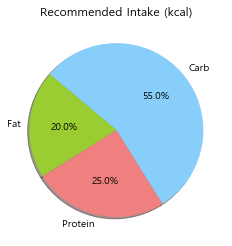


------------------------------------------------------------------------------------------------

권장섭취량:
탄수화물: 202.0g
단백질: 91.8g
지방: 32.6g
권장 섭취 칼로리 총합: 1468 kcal

------------------------------------------------------------------------------------------------



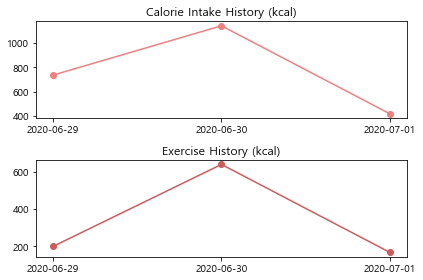


------------------------------------------------------------------------------------------------


------------------------------------------------------------------------------------------------



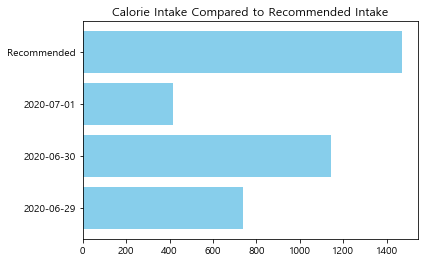


------------------------------------------------------------------------------------------------



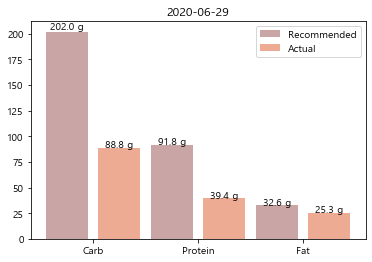

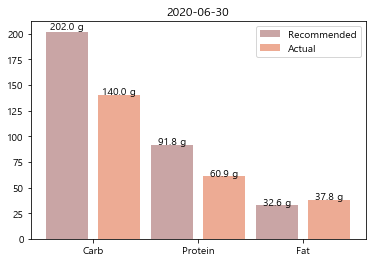

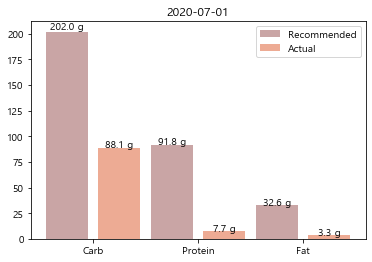


------------------------------------------------------------------------------------------------



1: 사용자 등록
2: 등록된 사용자 목록
3: 나에게 필요한 서비스 등록
4: 나의 현재 상황 보기
5: 나의 날짜별 식단 및 운동 기록하기
6: 사용자 간 랭킹 순위
7: 프로그램 종료

어떤 서비스를 이용하시겠습니까?6

------------------------------------------------


***사용자 간 순위***
Name	Total Score
이나연	285.0
홍길동	16.0



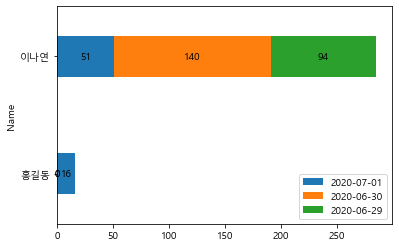


실행시간은: 0.19948673248291016

------------------------------------------------



1: 사용자 등록
2: 등록된 사용자 목록
3: 나에게 필요한 서비스 등록
4: 나의 현재 상황 보기
5: 나의 날짜별 식단 및 운동 기록하기
6: 사용자 간 랭킹 순위
7: 프로그램 종료

어떤 서비스를 이용하시겠습니까?7

프로그램을 종료합니다.


In [10]:
if os.path.exists('plist.csv'):
    df = pd.read_csv('plist.csv')
    Person.pnum = len(df)
    try:
        Diet_Person.dpnum = sum(df['onDiet'] =='Y')
        Keep_Person.npnum = sum(df['onDiet']=='N')
    except KeyError:
        pass
else:
    Person.pnum = 0
while True:
    print("\n")
    print("1: 사용자 등록")
    print("2: 등록된 사용자 목록")
    print("3: 나에게 필요한 서비스 등록")
    print("4: 나의 현재 상황 보기")
    print("5: 나의 날짜별 식단 및 운동 기록하기")
    print("6: 사용자 간 랭킹 순위")
    print("7: 프로그램 종료")
    menu = input("\n어떤 서비스를 이용하시겠습니까?")
    if menu=='7':
        print("\n프로그램을 종료합니다.")
        break
    elif menu=='1':
        person=Person()
    elif menu=='2':
        if os.path.exists('plist.csv'):
            f = open('plist.csv','r',encoding='utf-8')
            rdr = csv.reader(f)
            for line in rdr:
                for item in line:
                    print(item,end="\t")
                print()
            f.close()
            print("등록된 총 %d명의 사용자 중 다이어트를 희망하는 사람은 %d명, 유지를 희망하는 사람은 %d명 입니다."%(Person.pnum,Diet_Person.dpnum,Keep_Person.npnum))
        else:
            print("아직 등록된 사용자가 존재하지 않습니다.")
    elif menu=='3':
        menu_3()
    elif menu=='4':
        menu_4()
    elif menu=='5':
        menu_5()
    elif menu=='6':
        if Person.pnum==0:
            print("등록된 사용자가 없습니다.")
            continue
        menu_6()
    else:
        print("1~7사이의 값을 입력하시오.")